<a href="https://colab.research.google.com/github/namne21123-ops/Supply-Chain-Learning/blob/main/Nam_Dec_11_Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
df = pd.read_csv("/SampleSuperstore.csv")

print("--- Total COLUMNS in files")
print(df.columns.tolist())


--- Total COLUMNS in files
['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']


In [27]:
import pandas as pd

file_path = "/SampleSuperstore.csv"
df = pd.read_csv(file_path)

def quick_setup_no_date(df):
  df_new = df.copy()

  if 'Postal Code' in df_new.columns:
    df_new['Postal Code'] = df_new['Postal Code'].fillna(5401)

  return df_new

df_clean = quick_setup_no_date(df)

print("✅ SET UP SUCCESSFULLY! System is ready")
print(f"Total COLUMNS: {len(df_clean)}")
print("Existing Columns:", df_clean.columns.tolist())


✅ SET UP SUCCESSFULLY! System is ready
Total COLUMNS: 9994
Existing Columns: ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']


In [29]:
ship_analysis = df_clean.groupby('Ship Mode')[['Sales', 'Profit']].sum()

ship_analysis['Margin ($)'] = (ship_analysis['Profit'] / ship_analysis['Sales']) * 100

print("--- Transportation Efficiency Ranking ---")
print(ship_analysis.sort_values(by='Margin ($)', ascending=False))


--- Transportation Efficiency Ranking ---
                       Sales       Profit  Margin ($)
Ship Mode                                            
First Class     3.514284e+05   48969.8399   13.934513
Second Class    4.591936e+05   57446.6354   12.510331
Same Day        1.283631e+05   15891.7589   12.380315
Standard Class  1.358216e+06  164088.7875   12.081202


--- 🚨 Top 5 Products with the biggest losses ---
Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Name: Profit, dtype: float64


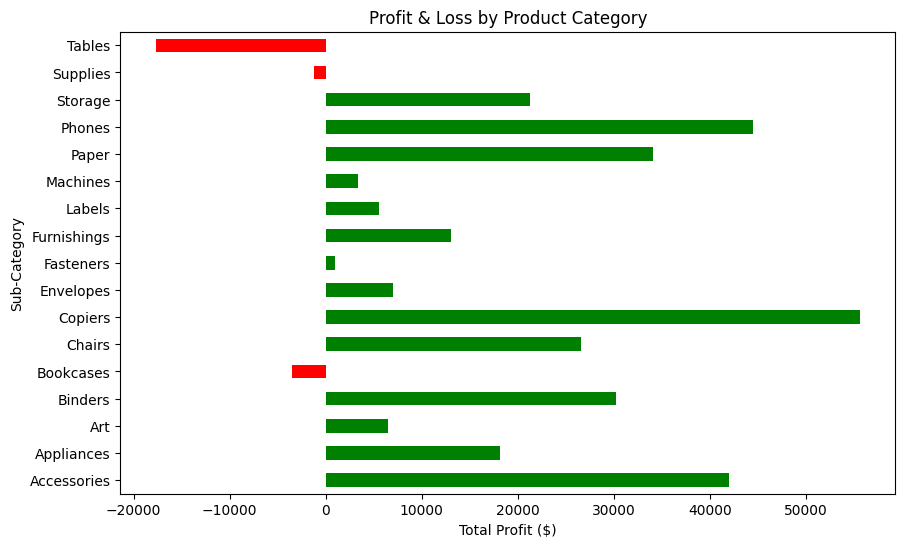

In [32]:
sub_cat_analysis = df_clean.groupby('Sub-Category')['Profit'].sum()

print("--- 🚨 Top 5 Products with the biggest losses ---")
print(sub_cat_analysis.head(5))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sub_cat_analysis.plot(kind='barh', color=['red' if x < 0 else 'green' for x in sub_cat_analysis])
plt.title('Profit & Loss by Product Category')
plt.xlabel('Total Profit ($)')
plt.show()

<Axes: title={'center': 'Strategy Check: Does Discount Kill Profit??'}, xlabel='Discount', ylabel='Profit'>

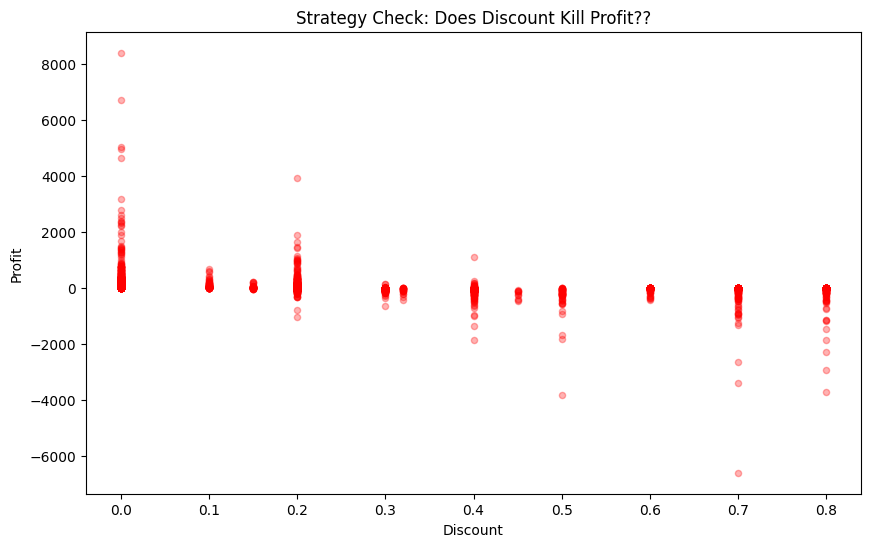

In [33]:
df_clean.plot.scatter(x='Discount', y='Profit',
                      color='red', alpha=0.3,
                      figsize=(10, 6),
                      title='Strategy Check: Does Discount Kill Profit??')